In [16]:
# libraries
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt

In [17]:
perfomances_dt2 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt2.rds")[None] # also works for RData
percent20_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/percent20_dt.rds")[None] # also works for RData
percent20_dt = percent20_dt[['NMS','policy']]

In [3]:
#add the baselevel
df = pd.DataFrame({'NMS': ['dynamic'],
                   'policy': ['ratio_5']})
percent20_dt = percent20_dt.append(df, ignore_index=True)

# #Filter the rows that are in the 20 percent
keys = list(percent20_dt.columns.values)
i1 = perfomances_dt2.set_index(keys).index
i2 = percent20_dt.set_index(keys).index
perfomances_opt_df = perfomances_dt2[i1.isin(i2)].reset_index()

# #Rename the base-level
perfomances_opt_df.loc[perfomances_opt_df.policy == "ratio_5","policy"]= "nopolicy_0"
# Get the base-level  data and name it with a zero. This is to estimate the change or delta
baselevel_df = perfomances_dt2.loc[(perfomances_dt2.policy == "ratio_5")& (perfomances_dt2.NMS == "static"),['id_10', 'id_field', 'z', 'N_fert','L','P']]
baselevel_df = baselevel_df.rename(columns={"N_fert":"N_fert_0", "L": "L_0", "P": "P_0"})

# # Merge it with the perfomances_opt_df
perfomances_opt_df = pd.merge(perfomances_opt_df, baselevel_df,  how='left', left_on=['id_10', 'id_field', 'z'], right_on = ['id_10', 'id_field', 'z'])

# Calculate the differences in P and L
perfomances_opt_df['P_diff'] = perfomances_opt_df['P'] - perfomances_opt_df['P_0']
perfomances_opt_df['L_diff'] = perfomances_opt_df['L'] - perfomances_opt_df['L_0']
perfomances_opt_df

,index,policy,region,id_10,NMS,z,id_field,Y_corn,Y_soy,L1,...,L,N_fert,P,G,area_ha,N_fert_0,L_0,P_0,P_diff,L_diff
0,0,nopolicy_0,3,5,dynamic,15,1.0,13625.801159,4179.852134,8.286348,...,21.446334,130.0,1816.612162,0.000000,40.0,180.0,34.218926,1879.085651,-62.473489,-12.772592
1,4,ratio_9,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,...,18.770876,120.0,1728.656868,67.200000,40.0,180.0,34.218926,1879.085651,-150.428783,-15.448050
2,27,cut_11,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,...,18.770876,120.0,1795.856868,0.000000,40.0,180.0,34.218926,1879.085651,-83.228783,-15.448050
3,53,bal_60,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,...,18.770876,120.0,1795.856868,0.000000,40.0,180.0,34.218926,1879.085651,-83.228783,-15.448050
4,60,fee_4,3,5,dynamic,15,1.0,13427.549054,4179.851724,7.365996,...,18.770876,120.0,1787.880639,7.976229,40.0,180.0,34.218926,1879.085651,-91.205013,-15.448050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161235,4772556,nopolicy_0,1,1526,dynamic,29,1.0,12571.601761,4072.108344,20.196424,...,50.056732,180.0,1634.024247,0.000000,40.0,200.0,57.994039,1642.356269,-8.332022,-7.937307
161236,4772560,ratio_9,1,1526,dynamic,29,1.0,12336.913755,4073.163776,19.378366,...,47.890463,170.0,1512.967926,95.200000,40.0,200.0,57.994039,1642.356269,-129.388343,-10.103576
161237,4772583,cut_11,1,1526,dynamic,29,1.0,11970.442516,4073.277224,18.224193,...,46.153155,160.0,1563.861952,0.000000,40.0,200.0,57.994039,1642.356269,-78.494316,-11.840884
161238,4772609,bal_60,1,1526,dynamic,29,1.0,12336.913755,4073.163776,19.378366,...,47.890463,170.0,1608.167926,0.000000,40.0,200.0,57.994039,1642.356269,-34.188343,-10.103576


In [4]:
#Average across z
# perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field'], as_index=False).mean()
perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field']).mean().reset_index().drop(['index'], axis=1)

# Split value columns 
perfomances_opt_df2['policy_name'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df2['policy_val'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.L_0 < 200]

perfomances_opt_df2[perfomances_opt_df2.policy == 'nopolicy_0']

,policy,NMS,id_10,id_field,Y_corn,Y_soy,L1,L2,L,N_fert,P,G,area_ha,N_fert_0,L_0,P_0,P_diff,L_diff,policy_name,policy_val
12093,nopolicy_0,dynamic,5,1.0,14427.638731,4070.431793,12.370430,11.593123,23.963553,158.75,1908.744422,0.0,40.0,180.0,29.730097,1923.741038,-14.996615,-5.766544,nopolicy,0
12094,nopolicy_0,dynamic,5,2.0,13997.895427,4316.834881,24.565150,18.568485,43.133635,161.25,1846.830360,0.0,40.0,180.0,49.856727,1855.907319,-9.076959,-6.723091,nopolicy,0
12095,nopolicy_0,dynamic,5,3.0,14859.064955,4126.676550,21.780056,16.273607,38.053663,173.75,1958.644094,0.0,40.0,180.0,40.012735,1964.049139,-5.405046,-1.959073,nopolicy,0
12096,nopolicy_0,dynamic,5,4.0,14142.135490,4274.678842,17.734320,12.769356,30.503676,191.25,1846.023969,0.0,40.0,180.0,27.994722,1834.542981,11.480988,2.508954,nopolicy,0
12097,nopolicy_0,dynamic,16,1.0,13988.665652,4126.065012,13.862058,15.325232,29.187290,188.75,1826.288191,0.0,40.0,180.0,27.536120,1819.412778,6.875413,1.651170,nopolicy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,nopolicy_0,dynamic,1514,2.0,11379.727047,4226.181355,25.690870,16.813126,42.503996,193.75,1457.536787,0.0,40.0,200.0,46.100404,1470.361820,-12.825033,-3.596408,nopolicy,0
16120,nopolicy_0,dynamic,1517,1.0,11827.186001,3862.201606,22.738579,13.796143,36.534721,192.50,1521.056040,0.0,40.0,200.0,38.907201,1535.447736,-14.391695,-2.372479,nopolicy,0
16121,nopolicy_0,dynamic,1522,1.0,11700.579750,3760.492561,22.794905,10.994350,33.789255,193.75,1502.456165,0.0,40.0,200.0,35.592621,1507.089194,-4.633029,-1.803366,nopolicy,0
16122,nopolicy_0,dynamic,1522,2.0,11350.161769,4074.605406,16.280415,14.015004,30.295419,192.50,1454.272648,0.0,40.0,200.0,32.702446,1463.105490,-8.832842,-2.407027,nopolicy,0


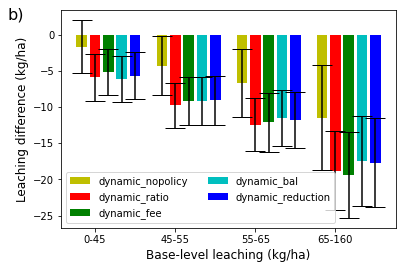

In [13]:
# BARCHART L change by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'dynamic'].groupby(['policy_name', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_fee_dt = bar_dt[(bar_dt['policy_name'] == 'fee')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'cut')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['L_diff']['mean'],color = 'y', label = 'dynamic_nopolicy',
      yerr=bar_nopolicy_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['L_diff']['mean'],color = 'r',label = 'dynamic_ratio',
      yerr=bar_ratio_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['L_diff']['mean'],color = 'g',label = 'dynamic_fee',
      yerr=bar_fee_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_bal_dt['L_diff']['mean'],color = 'c',label = 'dynamic_bal',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos5, height = bar_nred_dt['L_diff']['mean'],color = 'b',label = 'dynamic_reduction',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)


plt.gcf().text(0, 0.85, 'b)', fontsize=16)
plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

plt.xticks(pos2, ['0-45', '45-55', '55-65', '65-160'])
plt.legend(ncol=2)
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300)

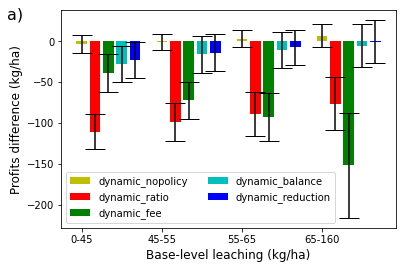

In [14]:
# BARCHART P_diff by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'dynamic'].groupby(['policy_name', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_fee_dt = bar_dt[(bar_dt['policy_name'] == 'fee')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'cut')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal') ]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'y', label = 'dynamic_nopolicy',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'dynamic_ratio',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'dynamic_fee',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_bal_dt['P_diff']['mean'],color = 'c', label = 'dynamic_balance',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos5, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'dynamic_reduction',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
plt.xticks(pos1, ['0-45', '45-55', '55-65', '65-160'])
plt.legend(ncol=2)
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300)

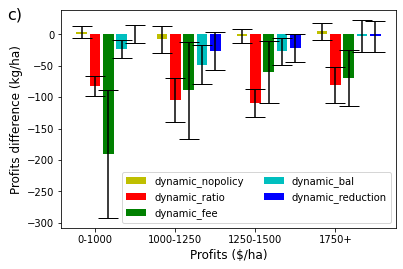

In [15]:
# BARCHART P_diff change by base-level L

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 1000, 1250,1750, 2000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == 'dynamic'].groupby(['policy_name', 'NMS', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_fee_dt = bar_dt[(bar_dt['policy_name'] == 'fee')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'cut')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'y', label = 'dynamic_nopolicy',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'dynamic_ratio',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'dynamic_fee',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_bal_dt['P_diff']['mean'],color = 'c', label = 'dynamic_bal',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos5, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'dynamic_reduction',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

plt.legend(ncol=2)

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)

plt.xticks(pos2, ['0-1000', '1000-1250','1250-1500', '1750+'])

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# ratio_1_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
# fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
# nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
# subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_opt_df2['NMS'] == 'dynamic')]
fee_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'fee') & (perfomances_opt_df2['NMS'] == 'dynamic')]
nred_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'cut') & (perfomances_opt_df2['NMS'] == 'dynamic')]
bal_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'bal') & (perfomances_opt_df2['NMS'] == 'dynamic')]
nopolicy_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nopolicy') & (perfomances_opt_df2['NMS'] == 'dynamic')]

In [ ]:
# Profits change by base-level P
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['P_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(fee_2_dt['P_0'], fee_2_dt['P_diff'], color = 'g', label = 'fee', s = 10)
ax.scatter(nred_2_dt['P_0'], nred_2_dt['P_diff'], color = 'b', label = 'reduction', s = 10)
ax.scatter(nopolicy_2_dt['P_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_dynamic')

plt.legend()

plt.xlabel("Base-level Profits (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
fee_2_dt

In [ ]:
# Profits change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(fee_2_dt['L_0'], fee_2_dt['P_diff'], color = 'g', label = 'dynamic-fee', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['P_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'dynamic_nopolicy', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_a.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# L change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['L_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(fee_2_dt['L_0'], fee_2_dt['L_diff'], color = 'g', label = 'dynamic-fee', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['L_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['L_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_b.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
perfomances_opt_df2

In [ ]:
import seaborn as sns

sns.distplot(nopolicy_2_dt['P_diff'], hist = False, kde = True,color = 'y', kde_kws = {'linewidth': 3}, label = 'dynamic_nopolicy')
sns.distplot(ratio_2_dt['P_diff'], hist = False, kde = True,color = 'r', kde_kws = {'linewidth': 3}, label = 'dynamic-ratio')
sns.distplot(fee_2_dt['P_diff'], hist = False, kde = True,color = 'g', kde_kws = {'linewidth': 3}, label = 'dynamic-fee')
sns.distplot(bal_2_dt['P_diff'], hist = False, kde = True,color = 'c', kde_kws = {'linewidth': 3}, label = 'dynamic-bal')
sns.distplot(nred_2_dt['P_diff'], hist = False, kde = True,color = 'b', kde_kws = {'linewidth': 3}, label = 'dynamic-reduction')

# Plot formatting
plt.legend(prop={'size': 16})
# plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Profits difference ($/ha)')
plt.ylabel('Density')

In [ ]:
perfomances_opt_df[perfomances_opt_df.NMS == '1']

In [ ]:
ratio_2_dt = perfomances_dt2[(perfomances_dt2.policy == 'ratio_11') & (perfomances_dt2.NMS == '2')]

ratio_2_dt

In [ ]:
pd.melt(ratio_2_dt, id_vars=['policy', 'id_10', 'id_field', 'z','NMS'], value_vars=['Y_corn', 'Y_soy', , 'L1' ,'L2',
                                                                                    'N_fert', 'P', 'G'])